In [1]:
import matplotlib.pyplot as plt
from pydicom import dcmread
import os
import numpy as np
import cv2
import skimage
from skimage import measure

In [2]:
def show_dicom_image(med_img, title=""):
    plt.figure(figsize=(15, 7))
    plt.imshow(med_img, cmap='gray')
    plt.title(title)
    plt.axis('off')

In [3]:
def transform_to_hu(medical_image, image):
    intercept = medical_image.RescaleIntercept
    slope = medical_image.RescaleSlope
    hu_image = image * slope + intercept

    return hu_image

In [4]:
def read_dicom_image(file_path):
    medical_image = dcmread(file_path)
    pixel_array = medical_image.pixel_array
    return medical_image, pixel_array

I1680000

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 168
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.1.4.105159.30000021013010280633300022453
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113704.7.0.2
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.1.4.105159.30000021013010280633300022453
(0008, 0020) Study Date                          DA: '20210130'
(0008, 0021) Series Date          

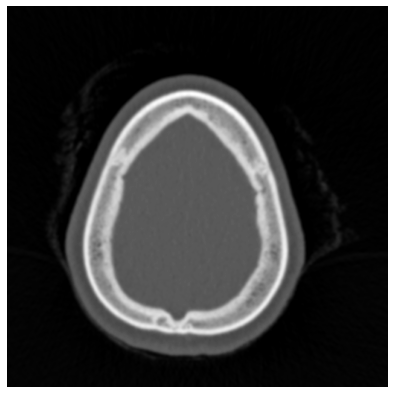

In [6]:
mi , original_image = read_dicom_image("../Database/2EFVJVCN/I1000000")

print(mi)

hu_image = transform_to_hu(mi, original_image)

show_dicom_image(hu_image)

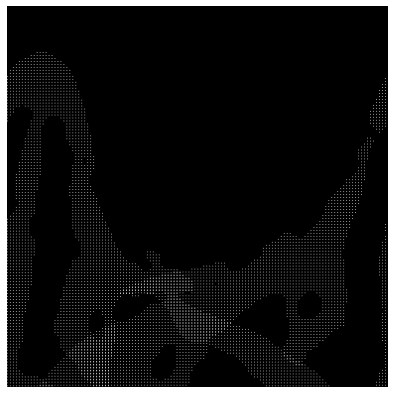

In [6]:
medical_image, pixel_array = read_dicom_image("../Database/2EFVJVCN-BigReg-FFA-d1-q1/I1680000")

hu_image = transform_to_hu(medical_image, pixel_array)

show_dicom_image(hu_image)

In [7]:
print(pixel_array.min(), pixel_array.max())
labels_mask = measure.label(pixel_array, background=pixel_array.min())

regions = measure.regionprops(labels_mask)
regions.sort(key=lambda x: x.area, reverse=True)

if len(regions) > 1:
    for rg in regions[1:]:
        labels_mask[rg.coords[:,0], rg.coords[:,1]] = pixel_array.min()

labels_mask[labels_mask!=0] = pixel_array.max()
mask = labels_mask

0 2947


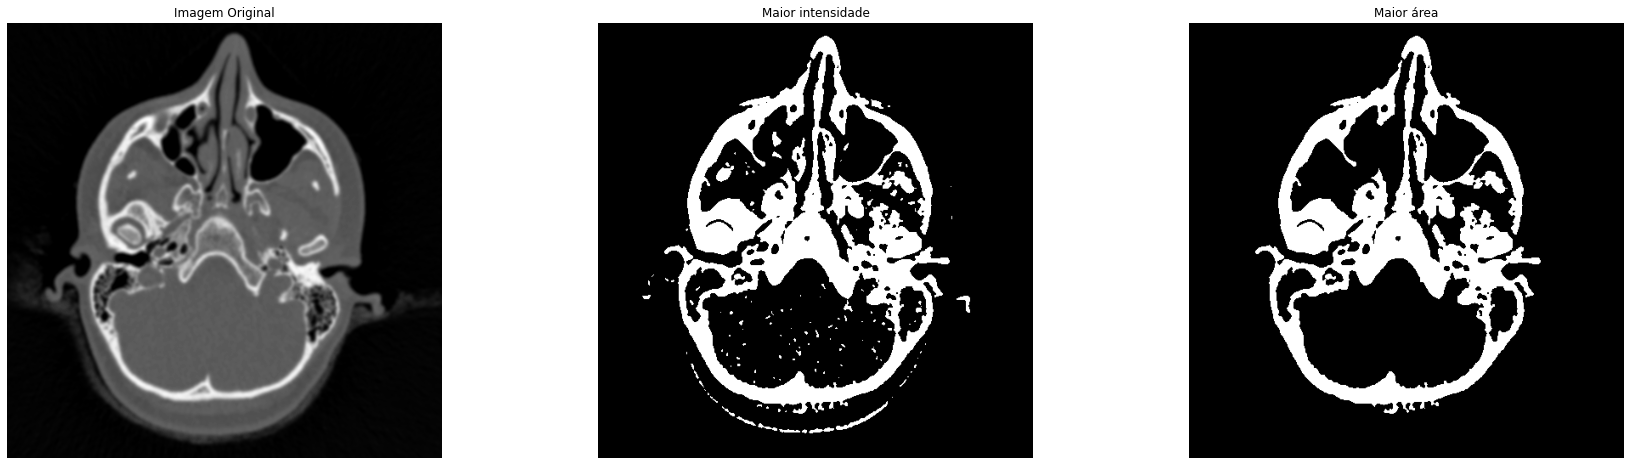

In [8]:
plt.figure(figsize=(30, 8))
plt.subplot(1,3,1)
plt.imshow(original_image, cmap='gray')
plt.axis('off')
plt.title("Imagem Original")
plt.subplot(1,3,2)
plt.imshow(hu_image, cmap='gray')
plt.axis('off')
plt.title("Maior intensidade")
plt.subplot(1,3,3)
plt.imshow(labels_mask, cmap='gray')
plt.axis('off')
plt.title("Maior área")

plt.show()